In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
data.shape

(545, 13)

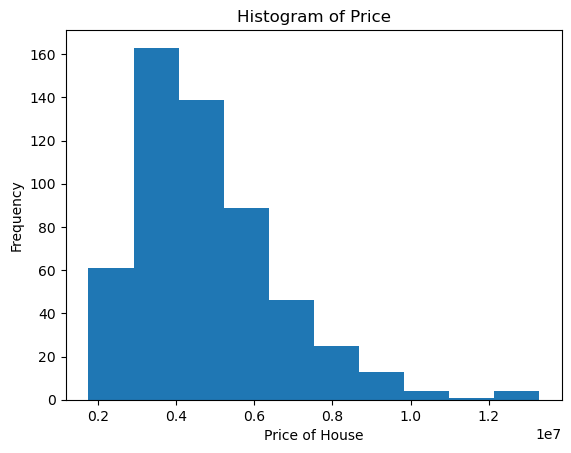

In [11]:
plt.hist(data['price'])
plt.xlabel('Price of House')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

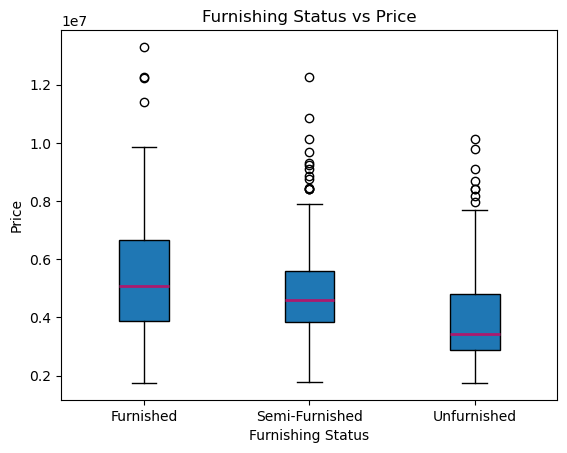

In [12]:
furnished = data.loc[data['furnishingstatus'] == 'furnished']['price']
semi_furn = data.loc[data['furnishingstatus']== 'semi-furnished']['price']
unfurnished = data.loc[data['furnishingstatus']=='unfurnished']['price']

labels = ['Furnished', 'Semi-Furnished', 'Unfurnished']

plt.boxplot([furnished, semi_furn, unfurnished], labels = labels, patch_artist = True, medianprops = {'linewidth':2, 'color':'#ab1a6e'})
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Furnishing Status vs Price')

plt.show()

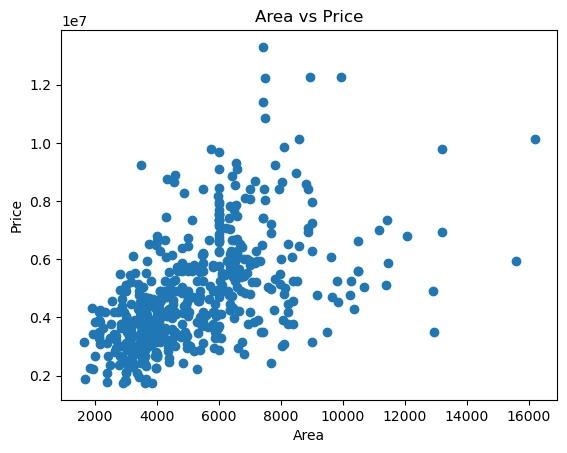

In [13]:
plt.scatter(data["area"], data['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')

plt.show()

In [14]:
# num_cols = data.select_dtypes(include = ['float64', 'int64']).columns
# correlation_matrix = data[num_cols].corr()

# sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

# plt.show()

data.corr(numeric_only = True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

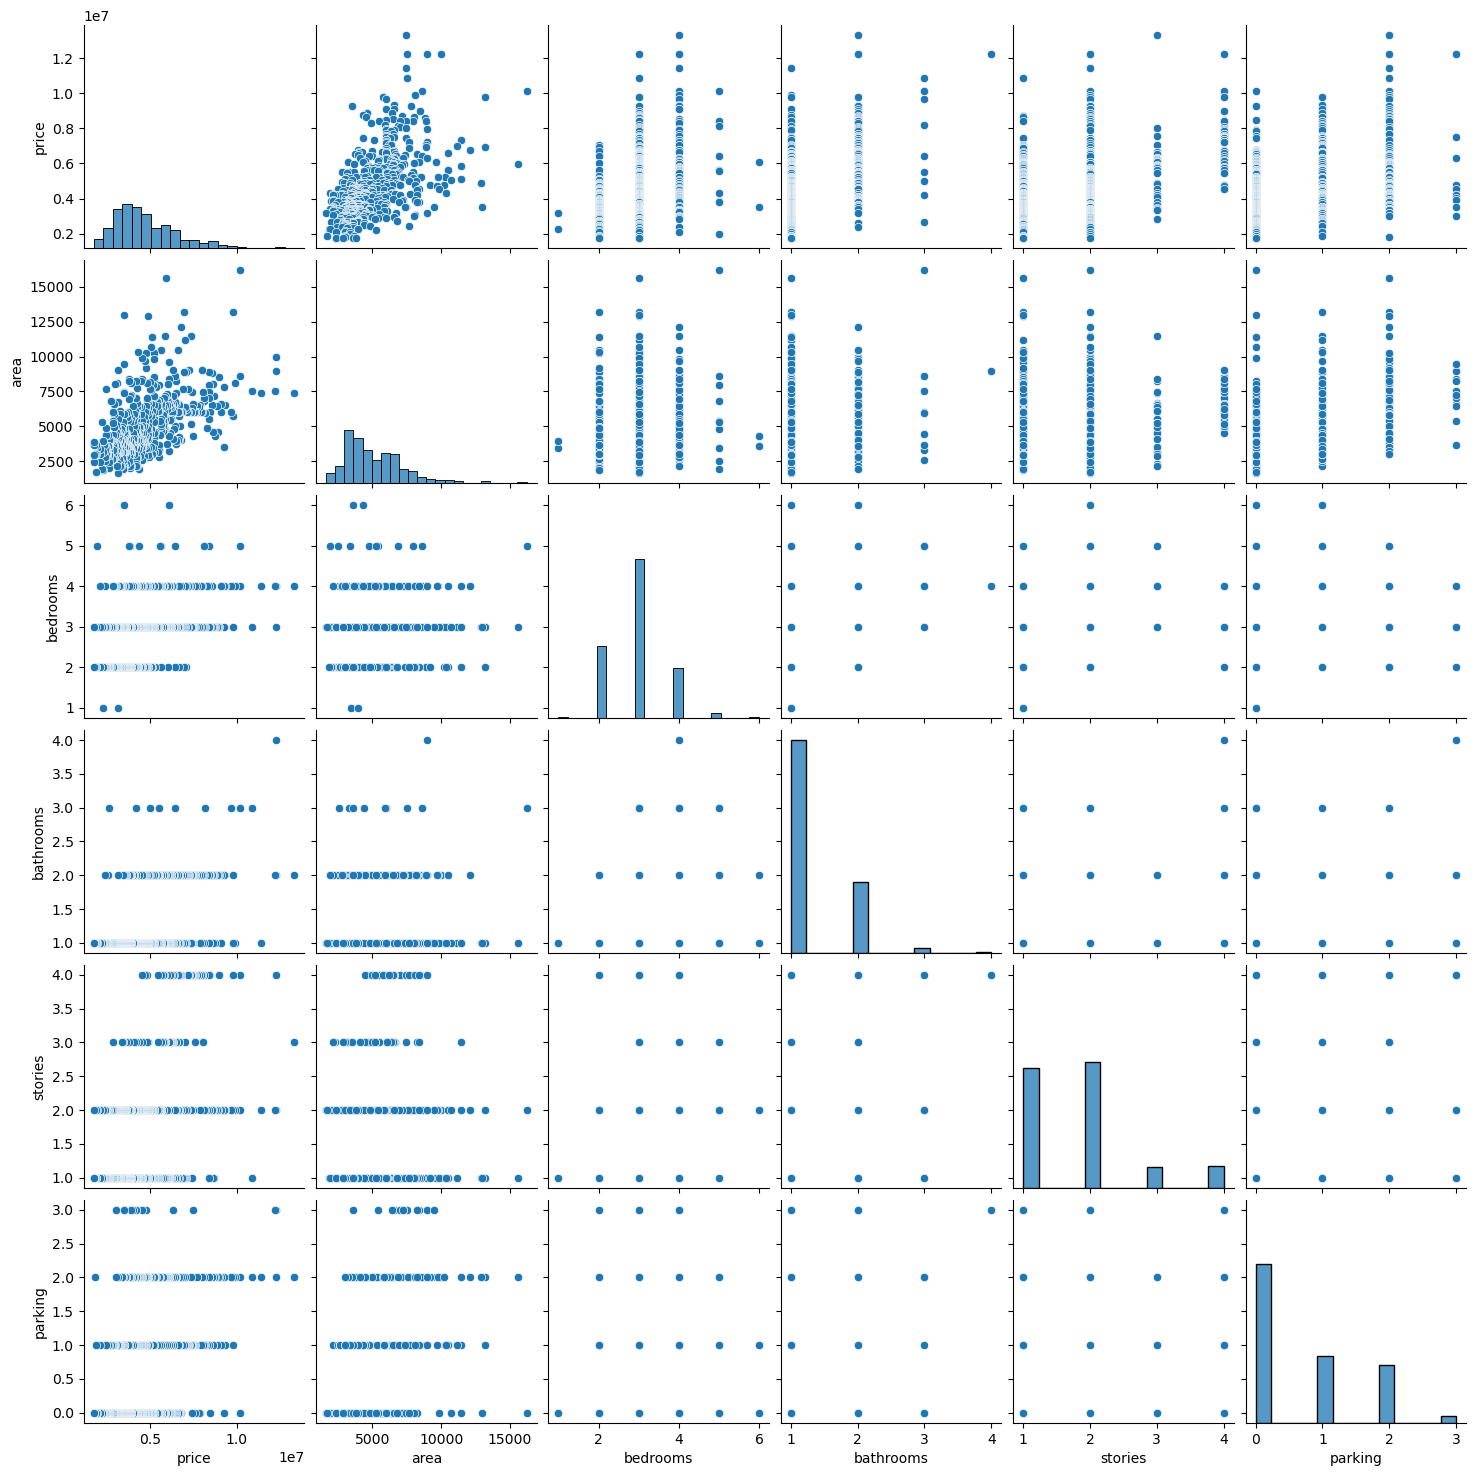

In [15]:
sns.pairplot(data)

plt.show()

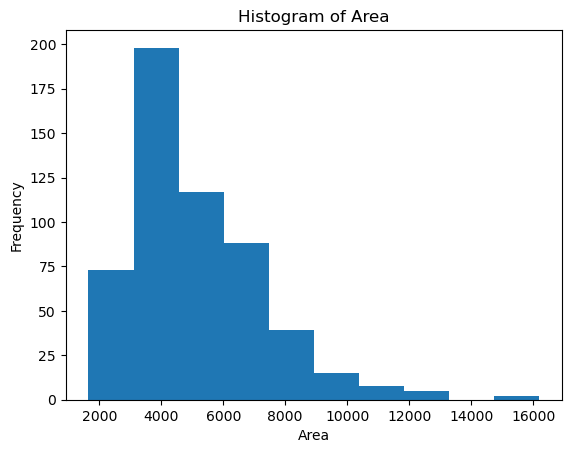

In [16]:
plt.hist(data['area'], bins = 10)
plt.ylabel('Frequency')
plt.xlabel('Area')
plt.title('Histogram of Area')

plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_6728\1625343479.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['price'], shade = True)
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


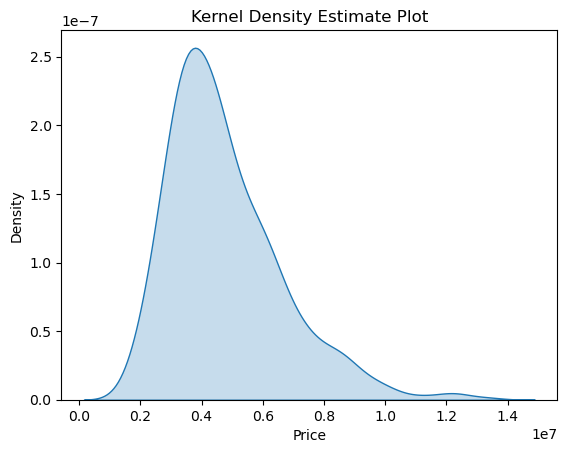

In [17]:
sns.kdeplot(data['price'], shade = True)
plt.ylabel('Density')
plt.xlabel('Price')
plt.title('Kernel Density Estimate Plot')

plt.show()

In [18]:
varlist= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, "no": 0})

data[varlist] = data[varlist].apply(binary_map)

In [19]:
data[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [21]:
dummy_cols = pd.get_dummies(data['furnishingstatus'])

dummy_cols.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [22]:
dummy_cols = pd.get_dummies(data['furnishingstatus'], drop_first = True)

dummy_cols.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [23]:
data = pd.concat([data, dummy_cols], axis = 1)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [24]:
data.drop(['furnishingstatus'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [25]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [26]:
np.random.seed(0)

data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [27]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,False,True
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,False,False
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,False,False
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,False,True


In [28]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,True,False
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,True,False
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,True,False


In [30]:
print(data_train.shape, data_test.shape)

(381, 14) (164, 14)


In [31]:
scaler = MinMaxScaler()

In [32]:
cols_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [34]:
data_train[cols_to_scale] = scaler.fit_transform(data_train[cols_to_scale])

In [35]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,False,True
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,True,False
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,False,False
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,False,False
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,False,True


In [36]:
x_train = data_train

y_train = data_train.pop('price')

y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [37]:
LR = LinearRegression()

LR.fit(x_train, y_train)

LinearRegression()

In [38]:
LR.score(x_train, y_train)

0.6814893088451202

In [39]:
data_test[cols_to_scale] = scaler.fit_transform(data_test[cols_to_scale])

In [40]:
x_test = data_test

y_test = data_test.pop('price')

In [41]:
prediction = LR.predict(x_test)

r2 = r2_score(y_test, prediction)

In [42]:
y_test.shape

y_test_matrix = y_test.values.reshape(-1, 1)

result_data = pd.DataFrame({'Actual': y_test_matrix.flatten(), 'Predicted': prediction.flatten()})

result_data.head()

,Actual,Predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827


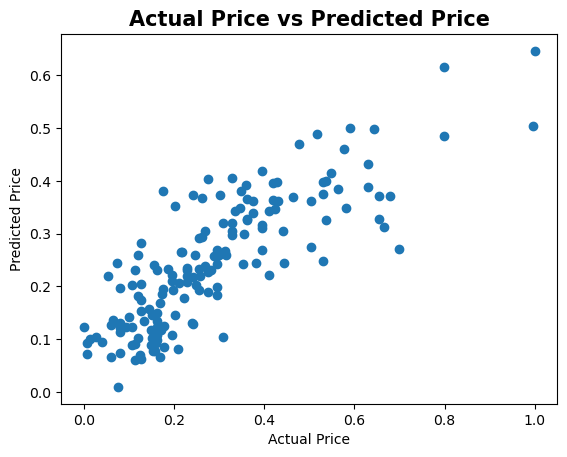

In [47]:
plt.scatter(y_test, prediction)

plt.title('Actual Price vs Predicted Price', fontdict = {'fontweight': 'bold', 'fontsize': 15})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()